In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import IPython.display as display
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Loading and Preprocessing

In [ ]:
data_rf = pd.read_csv('/content/drive/MyDrive/UW/HonorsTango/tango_rf.csv')

In [ ]:
data_lf = pd.read_csv('/content/drive/MyDrive/UW/HonorsTango/tango_lf.csv')

First take a look at the data to see what columns there are.

In [ ]:
data_rf

Not sure what 'SampleTimeFine' is, so to validate my guess, plot it against the index.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_rf.index, data_rf['SampleTimeFine'], marker='x')
plt.title('Index vs SampleTimeFine')
plt.xlabel('Index')
plt.ylabel('SampleTimeFine')
plt.grid(True)
plt.show()

Since 'SampleTimeFine' is just the time being recorded, it works the same way as the index, we can drop this column as well as other unnecessary columns.

In [ ]:
rf = data_rf.drop(columns=['SampleTimeFine', 'Unnamed: 11', 'PacketCounter'])
lf = data_lf.drop(columns=['SampleTimeFine', 'Unnamed: 11', 'PacketCounter'])
rf

# Exploratory analysis

#### Histogram for the distribution and spread of each measurement on each axis.

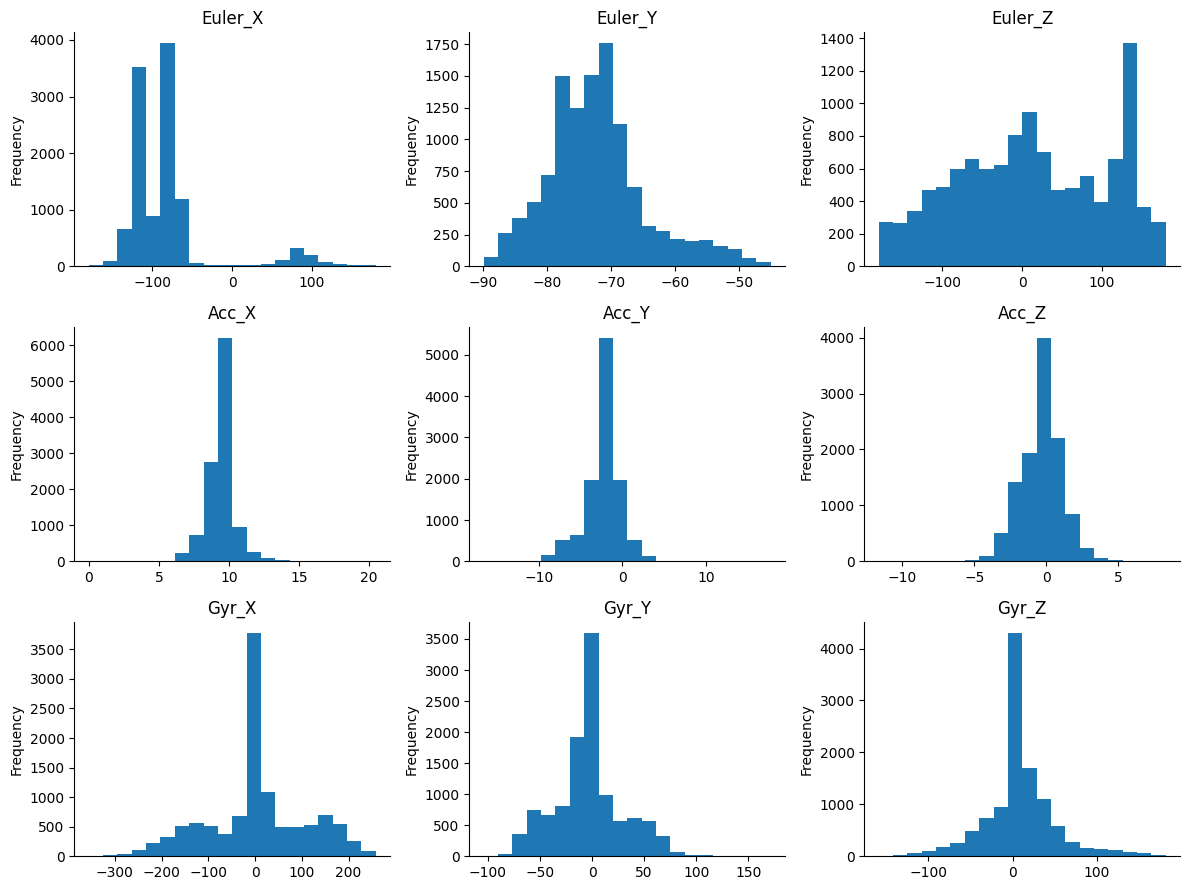

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

columns = ['Euler_X', 'Euler_Y', 'Euler_Z', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']
axes_list = [axes[i][j] for i in range(3) for j in range(3)]

for col, ax in zip(columns, axes_list):
    rf[col].plot(kind='hist', bins=20, title=col, ax=ax)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Our focus for now is acceleration. We can see that they are approximately normally distributed, with different centers and spread.

#### Timeseries plot for each measurement on each axis.

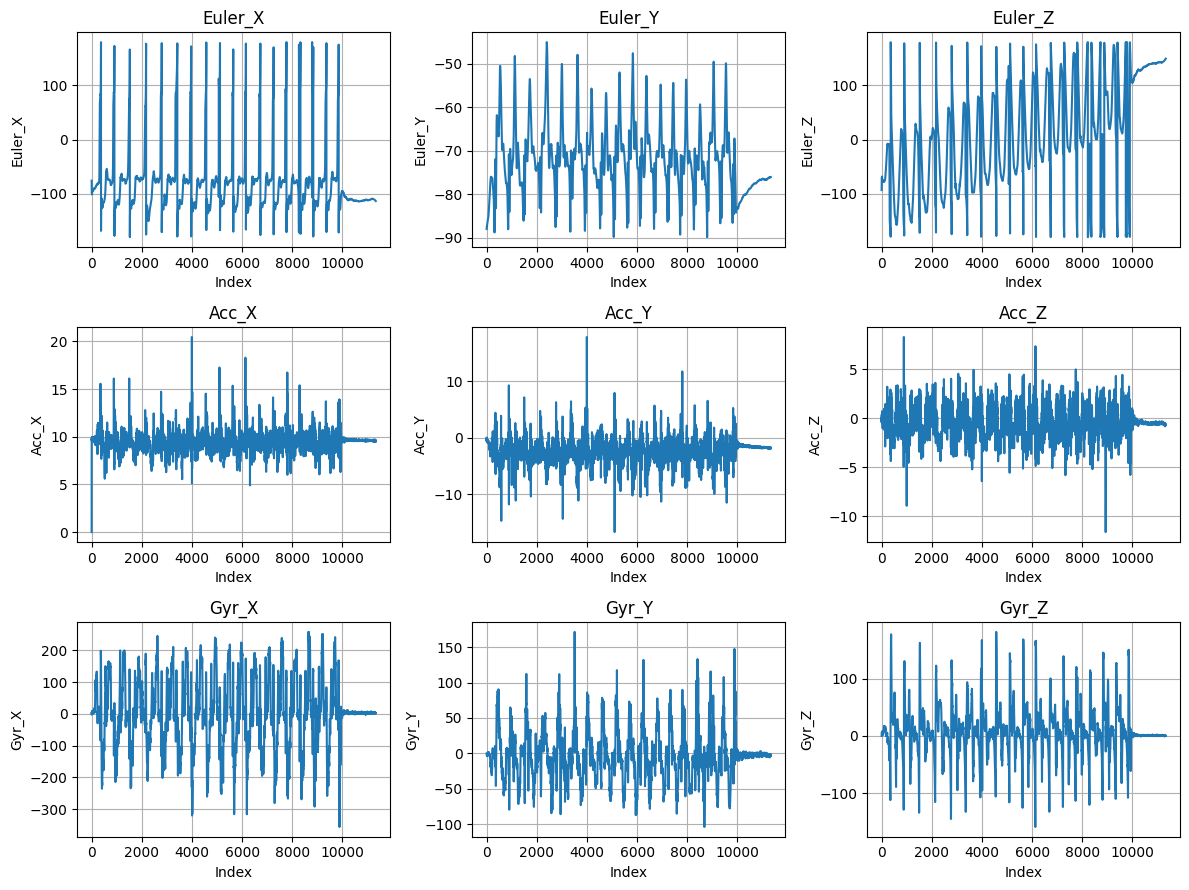

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes_list = [axes[i][j] for i in range(3) for j in range(3)]

for col, ax in zip(columns, axes_list):
    rf[col].plot(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.grid(True)


plt.tight_layout()
plt.show()

We can see that all measures follow a back-and-forth pattern. However, for Euler Z, there appears to be a weird acending pattern happening, which will be looked into later in the research.

#### Time series color-coded by foot

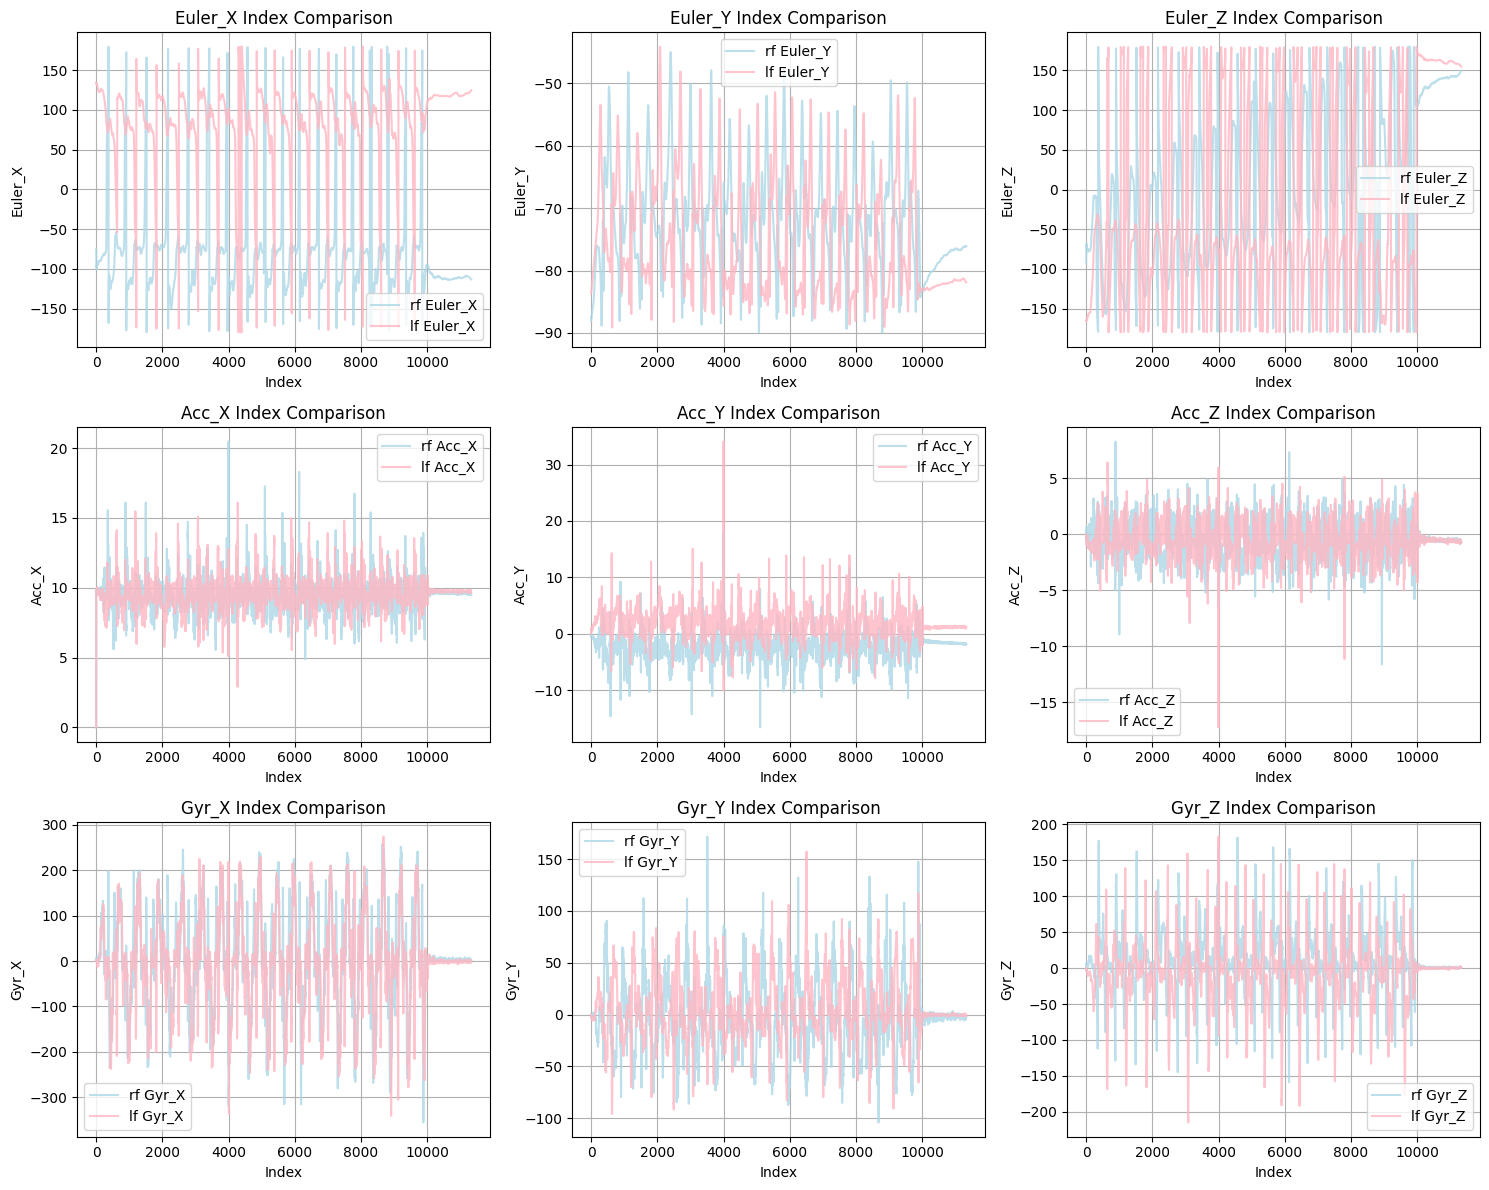

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

columns = ['Euler_X', 'Euler_Y', 'Euler_Z', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']
axes_list = [axes[i][j] for i in range(3) for j in range(3)]

for col, ax in zip(columns, axes_list):
    ax.plot(rf.index, rf[col], label=f'rf {col}', color='lightblue', alpha=0.8)
    ax.plot(lf.index, lf[col], label=f'lf {col}', color='lightpink', alpha=0.8)
    ax.set_title(f'{col} Index Comparison')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

We can see that the lines are like duplicates of each other, but slightly shifted in place. This makes sense, since both feet are doing the same movements but at alternating times.

#### Plotting each measurements on each axis with left foot against right foot.

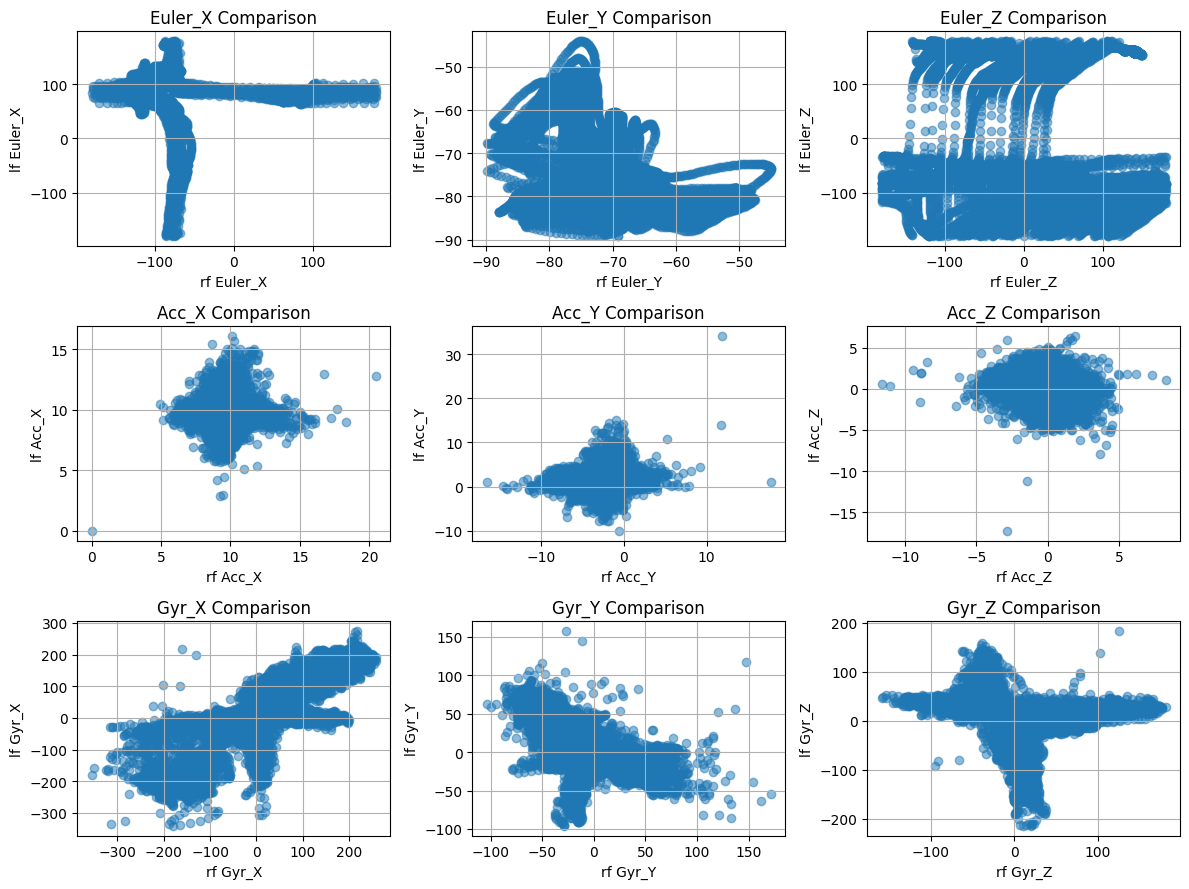

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

columns = ['Euler_X', 'Euler_Y', 'Euler_Z', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']
axes_list = [axes[i][j] for i in range(3) for j in range(3)]

for col, ax in zip(columns, axes_list):
    ax.scatter(rf[col], lf[col], alpha=0.5)
    ax.set_title(f'{col} Comparison')
    ax.set_xlabel(f'rf {col}')
    ax.set_ylabel(f'lf {col}')
    ax.grid(True)

plt.tight_layout()
plt.show()

#### Zooming into just the accelerations, plotting scatter plots between the left and right foot of the same axis.

Creating a dataframe containing just the acceleration.

In [ ]:
acc = pd.merge(lf[['Acc_X', 'Acc_Y', 'Acc_Z']], rf[['Acc_X', 'Acc_Y', 'Acc_Z']], left_index=True, right_index=True, suffixes=('_lf', '_rf'))

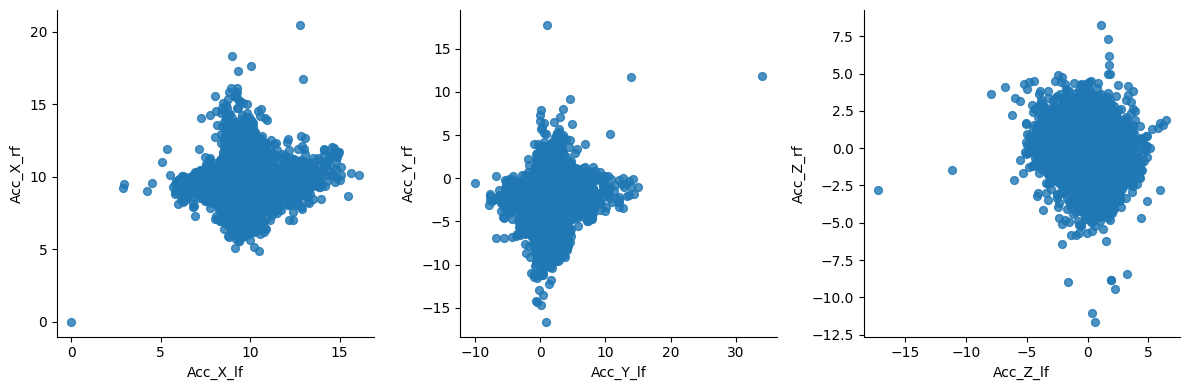

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

acc.plot(kind='scatter', x='Acc_X_lf', y='Acc_X_rf', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

acc.plot(kind='scatter', x='Acc_Y_lf', y='Acc_Y_rf', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

acc.plot(kind='scatter', x='Acc_Z_lf', y='Acc_Z_rf', s=32, alpha=.8, ax=axes[2])
axes[2].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Since they are all clustered into a ball or star shape, we can see why they might have low correlation with each other.

#### Correlation heat map of just the accelaration

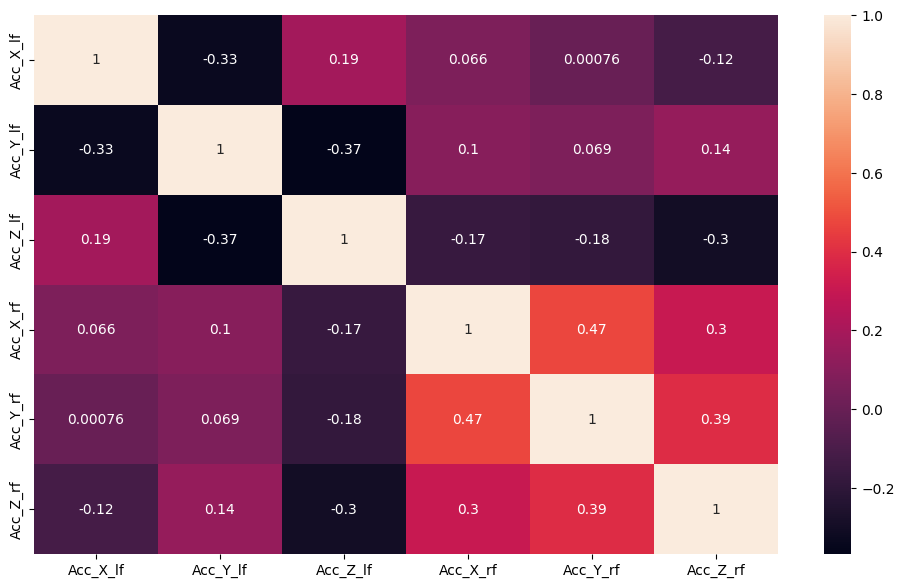

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(acc.corr(), annot = True)
plt.show()

#### Let's just see the correlation between feet for each measurement.

In [ ]:
correlations = {}
for column in lf.columns:
    correlations[column] = lf[column].corr(rf[column])

for column, corr_value in correlations.items():
    print(f'Correlation between {column} columns: {corr_value:.2f}')

Correlation between Euler_X columns: -0.08
Correlation between Euler_Y columns: -0.26
Correlation between Euler_Z columns: 0.07
Correlation between Acc_X columns: 0.07
Correlation between Acc_Y columns: 0.07
Correlation between Acc_Z columns: -0.30
Correlation between Gyr_X columns: 0.80
Correlation between Gyr_Y columns: -0.59
Correlation between Gyr_Z columns: -0.19


There are not much correlation in general. This may indicate a non-linear relationship.

# Exporting Data

Exporting some data for observable visualizations

In [ ]:
acc_indexed = acc.copy()
acc_indexed['index'] = acc.index

In [ ]:
acc_lf = pd.melt(acc[['Acc_X_lf', 'Acc_Y_lf', 'Acc_Z_lf']], var_name='axis_left', value_name='left_foot')

# Reshape the dataset for right foot
acc_rf = pd.melt(acc[['Acc_X_rf', 'Acc_Y_rf', 'Acc_Z_rf']], var_name='axis_right', value_name='right_foot')

# Merge the left and right foot data
acc_facet = pd.concat([acc_lf, acc_rf], axis=1).dropna().reset_index(drop=True)

# Display the reshaped dataset
print(acc_facet)

      axis_left  left_foot axis_right  right_foot
0      Acc_X_lf   0.000000   Acc_X_rf    0.000000
1      Acc_X_lf   9.758830   Acc_X_rf    9.699115
2      Acc_X_lf   9.756316   Acc_X_rf    9.798959
3      Acc_X_lf   9.770414   Acc_X_rf    9.759178
4      Acc_X_lf   9.760866   Acc_X_rf    9.763987
...         ...        ...        ...         ...
33988  Acc_Z_lf  -0.775118   Acc_Z_rf   -0.704415
33989  Acc_Z_lf  -0.775821   Acc_Z_rf   -0.696568
33990  Acc_Z_lf  -0.768051   Acc_Z_rf   -0.630781
33991  Acc_Z_lf  -0.748667   Acc_Z_rf   -0.685272
33992  Acc_Z_lf  -0.724268   Acc_Z_rf   -0.703798

[33993 rows x 4 columns]


In [ ]:
acc.to_csv('/content/drive/MyDrive/UW/HonorsTango/acc.csv', index=False)

In [ ]:
acc_facet.to_csv('/content/drive/MyDrive/UW/HonorsTango/acc_facet.csv', index=False)